# Importing the useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.utils import shuffle
import plotly.express as px
from matplotlib.legend_handler import HandlerLine2D
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from collections import Counter
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn import linear_model, ensemble, tree, model_selection,svm
from sklearn import metrics, linear_model, ensemble, tree, model_selection,svm
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

# Importing the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# These columns were added later and therefore not scaled
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


# Checking for missing values

In [4]:
df.isnull().values.any()

False

# EDA 

## Fraud vs Normal Transactions

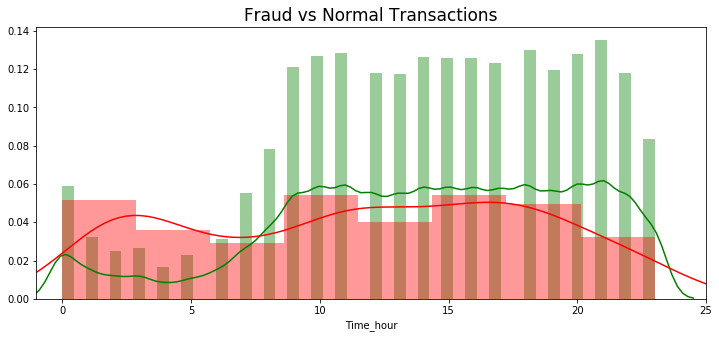

In [5]:
#Adding Time and hour to the dataset
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)


#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud vs Normal Transactions', fontsize=17)
plt.xlim([-1,25])
plt.show()

## Time distribuition of Fraud vs Normal transaction wrt Amount

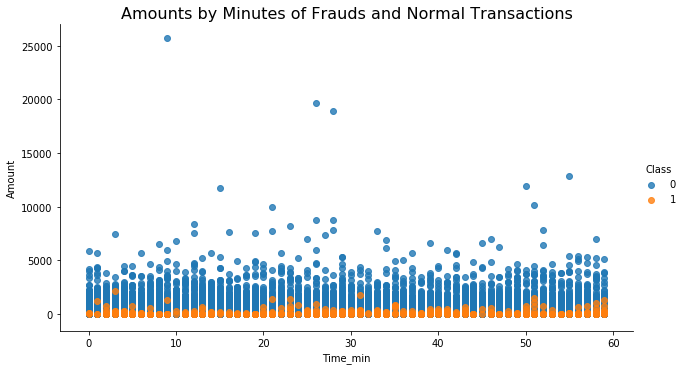

In [6]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

# Scaling the dataset

In [7]:
#Taking only the useful columns 
df=df.drop(['Time_hour','Time_min'], axis = 1)
scale = preprocessing.StandardScaler()
df[['Amount','Time']] = scale.fit_transform(df[['Amount','Time']])

# Checking for Correlation

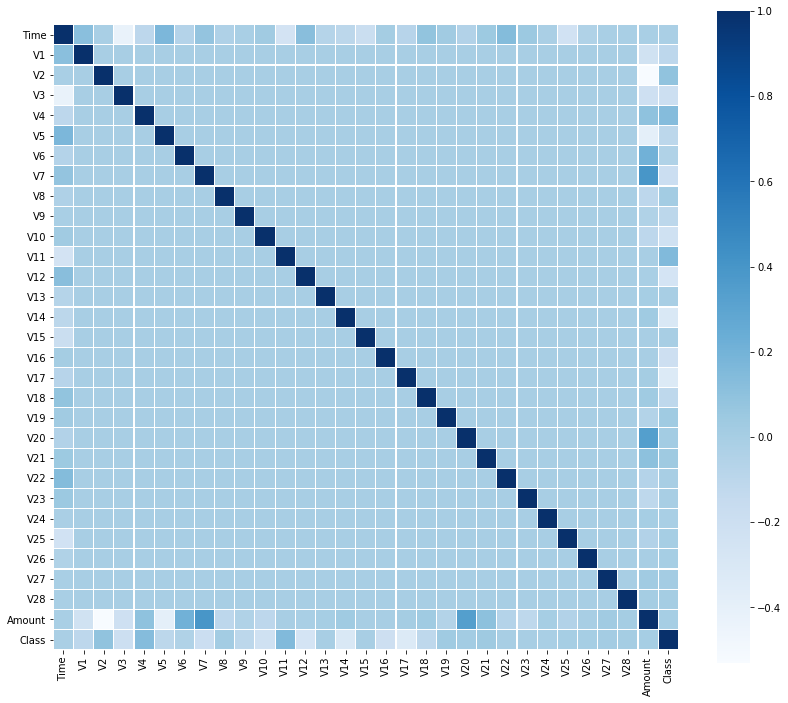

In [8]:
#Plotting map for visualising any correlation
colormap = plt.cm.Blues

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white')
plt.show()

# Checking Multicollinearity 



## Using variable inflation factor VIF for determining multicollinearity

* VIF= 1, No multicollinearity
* VIF= 2 to 5, Moderate multicollinearity
* VIF= inf, Perfect multicollinearity

In [9]:
# Creating a dataframe VIF
vif=pd.DataFrame()

# Adding a column in the dataframe with VIF
vif['Variables']= df.columns

# Applying VIF function
vif['VIF Factor']= [variance_inflation_factor(df.values,i) for i in range (df.shape[1])]

In [10]:
vif

,Variables,VIF Factor
0,Time,1.879918
1,V1,1.669145
2,V2,4.449500
3,V3,1.949404
4,V4,1.172547
5,V5,2.871825
6,V6,1.577435
7,V7,3.015651
8,V8,1.132845
9,V9,1.043040


## Correcting the VIF factor

In [11]:
#Dropping out the feature disrupting the others with multicollinearity
df=df.drop(['Amount'], axis=1)

In [12]:
# Creating a dataframe VIF
vif_new=pd.DataFrame()

# Adding a column in the dataframe with VIF
vif_new['Variables']= df.columns

# Applying VIF function
vif_new['VIF Factor']= [variance_inflation_factor(df.values,i) for i in range (df.shape[1])]

In [13]:
vif_new

,Variables,VIF Factor
0,Time,1.879773
1,V1,1.047038
2,V2,1.017543
3,V3,1.410266
4,V4,1.057606
5,V5,1.074735
6,V6,1.011490
7,V7,1.086163
8,V8,1.003373
9,V9,1.020048


# Checking class balance

In [14]:
#Checking the number of counts in our dependent feature/label
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class ratio')

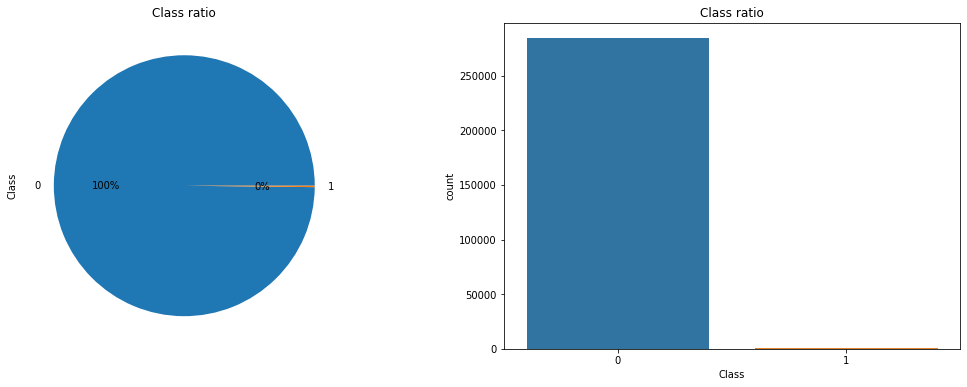

In [15]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df['Class'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('Class ratio')

#Countplot
sns.countplot('Class',data=df,ax=ax[1])
ax[1].set_title('Class ratio')


# Splitting the dataset into X and Y

In [16]:
#Splitting features and labels from the dataset
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

print(x.shape) 
print(y.shape)

(284807, 29)
(284807,)


# Splitting the dataset into Train and Test set

In [17]:
#Using train test split to perform the function
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, train_size=0.7, random_state=0)

# Treating Class imbalance with Random over sampler

In [18]:
# Using random over sampler (An oversampling technique)
oversample = RandomOverSampler()

# fitting oversampler on training set
x_over, y_over = oversample.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_over))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 199019, 1: 199019})


In [70]:
#Taking only a part of our dataset as the given dataset is too big and the computation for that might take long
X, Y = shuffle(x_over, y_over, random_state=0)

x_new=X[:10000]
y_new=Y[:10000]


# Comparing 10 different classifiers

We will use log loss and AUC (Area Under Curve) as the evaluation metric. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.

In [71]:
#Comparing 10 different classifiers
classifiers = [
    
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    xgb.XGBClassifier(),
]


# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss","AUC-ROC score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_new, y_new)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))

    
    logloss = log_loss(y_test, y_pred)
    print("Log Loss: {}".format(logloss))

        
    y_pred_proba= clf.predict_proba(x_test)
    fpr,tpr, threshold= metrics.roc_curve(y_test,y_pred_proba[:,-1])
    roc_auc= metrics.auc(fpr,tpr)
    print("AUC score: {}".format(roc_auc))

        
    log_entry = pd.DataFrame([[name, acc*100, logloss,roc_auc]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)



LogisticRegression
****Results****
Accuracy: 97.6101%
Log Loss: 0.8254602926113733
AUC score: 0.9812829464931724
KNeighborsClassifier
****Results****
Accuracy: 98.9057%
Log Loss: 0.37796526294366234
AUC score: 0.924885105983868
SVC
****Results****
Accuracy: 99.1690%
Log Loss: 0.28701101509797255
AUC score: 0.9807420529644983
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.7500%
Log Loss: 0.43172930690500544
AUC score: 0.9752225782453293
GaussianNB
****Results****
Accuracy: 97.5247%
Log Loss: 0.854969811835464
AUC score: 0.9593101238807283
DecisionTreeClassifier
****Results****
Accuracy: 99.0192%
Log Loss: 0.3387538720601837
AUC score: 0.9203867253147741
RandomForestClassifier
****Results****
Accuracy: 99.8935%
Log Loss: 0.03678571942657421
AUC score: 0.976838320208969
GradientBoostingClassifier
****Results****
Accuracy: 99.2006%
Log Loss: 0.27609653230826586
AUC score: 0.9819933577445235
AdaBoostClassifier
****Results****
Accuracy: 98.3790%
Log Loss: 0.5598738335010861
AUC scor

In [72]:
#Sorting the above results for a better comparison
log.sort_values(by=['Accuracy'], ascending=False)

,Classifier,Accuracy,Log Loss,AUC-ROC score
0,RandomForestClassifier,99.893496,0.036786,0.976838
0,XGBClassifier,99.434711,0.195248,0.978100
0,GradientBoostingClassifier,99.200637,0.276097,0.981993
0,SVC,99.169037,0.287011,0.980742
0,DecisionTreeClassifier,99.019229,0.338754,0.920387
0,KNeighborsClassifier,98.905703,0.377965,0.924885
0,LinearDiscriminantAnalysis,98.750044,0.431729,0.975223
0,AdaBoostClassifier,98.379036,0.559874,0.967982
0,LogisticRegression,97.610103,0.825460,0.981283
0,GaussianNB,97.524666,0.854970,0.959310


# Fitting the best model

It can be noticed from above that RandomForestClassifier outperforms the other classification models. Hence, it is taken for further consideration.

In [108]:
#Fitting the chosen model

model= RandomForestClassifier()
model.fit(x_new,y_new)

#Creating predictions and probability predictions

y_pred= model.predict(x_test)
y_pred_proba= model.predict_proba(x_test)

#Printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.65      0.84      0.74       147

    accuracy                           1.00     85443
   macro avg       0.83      0.92      0.87     85443
weighted avg       1.00      1.00      1.00     85443



# Plotting ROC AUC curve

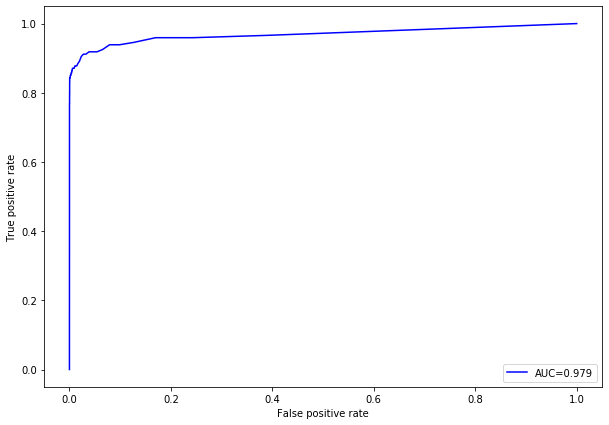

In [109]:
#Using Threshold, True postive and false positive rate to determine the AUC score
fpr,tpr, threshold= metrics.roc_curve(y_test,y_pred_proba[:,-1])
roc_auc1= metrics.auc(fpr,tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,'b',label="AUC=%0.3f" % roc_auc)
plt.legend(loc='lower right')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Hyperparameter tuning for the selected model

## Checking the best value for n_estimators

n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

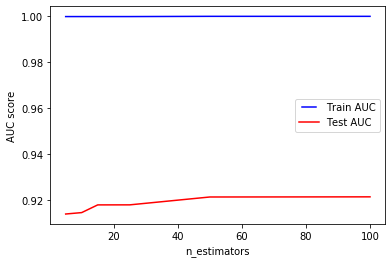

In [94]:
n_estimators = [5, 10, 15, 25, 50, 75, 100]

train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,random_state= 0)
    rf.fit(x_new,y_new)
    
    train_pred = rf.predict(x_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_new, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(x_test)
    fpr,tpr, threshold= metrics.roc_curve(y_test,y_pred)
    roc_auc1= metrics.auc(fpr,tpr)
    test_results.append(roc_auc1)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})


plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Here the training data predicts 100% correctly but fails while predicting testing data. This is an overfitting case.

## Checking the best value for max_depth

max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. 


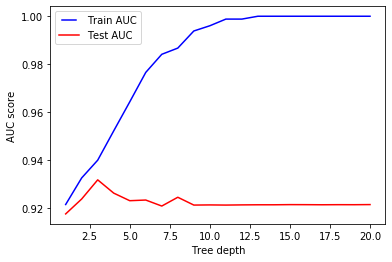

In [93]:
max_depths = np.linspace(1, 20, 20, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_new,y_new)
    
    train_pred = rf.predict(x_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_new, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})


plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

We can see that our model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data

## Checking the best value for min_samples_split

min_samples_split represents the minimum number of samples required to split an internal node

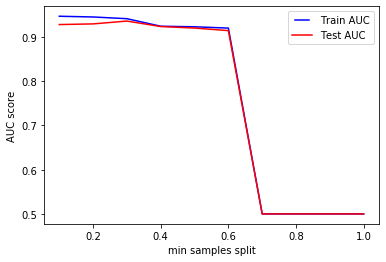

In [90]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(x_new,y_new)
    
    train_pred = rf.predict(x_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_new, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

We can clearly see that when we require all of the samples at each node, the model cannot learn enough about the data. This is an underfitting case

## Checking the best value for min_samples_leaf

min_samples_leaf is The minimum number of samples required to be at a leaf node

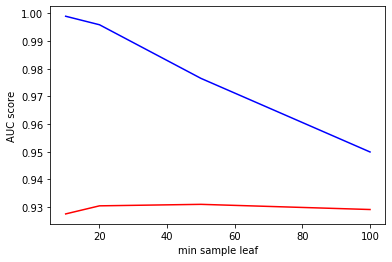

In [85]:
min_samples_leaf=(10,20,50,100)
train_results = []
test_results = []
for min_samples_leafs in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leafs, n_jobs=-1,random_state= 0)
    rf.fit(x_new,y_new)
    
    train_pred = rf.predict(x_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_new, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(x_test)
    fpr,tpr, threshold= metrics.roc_curve(y_test,y_pred)
    roc_auc3= metrics.auc(fpr,tpr)
    test_results.append(roc_auc3)
    
line1, = plt.plot(min_samples_leaf, train_results, color='blue', label='Train AUC')
line2, = plt.plot(min_samples_leaf, test_results,color='red', label='Test AUC')

plt.ylabel("AUC score")
plt.xlabel("min sample leaf")
plt.show()


We can see here that for our data the training and testing accuracy tends to divert at greater samples but fails to predict correctly at the begining or overfitting.

## Checking the best value for max_features

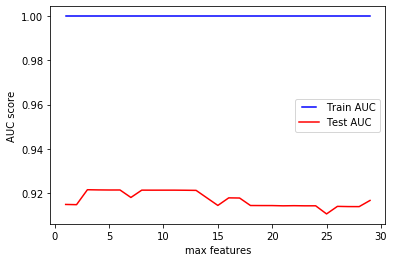

In [84]:
max_features = list(range(1,df.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(x_new,y_new)
    
    train_pred = rf.predict(x_new)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_new, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(max_features, train_results, color='blue', label='Train AUC')
line2, = plt.plot(max_features, test_results,color='red', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

Similarly, we can see that the training data predicts 100% correctly but fails while predicting testing data. This is also an overfitting case.

## Applying Grid search and Cross fold Validation

In [99]:
#Selecting best parameters
param_grid= {"n_estimators": range(10,100,10),
             "min_samples_leaf":range(5,50,5),
             'max_depth':range(5,15,5),
             "min_samples_split":range(5,50,5),
             }

RF_hyp= RandomForestClassifier()

#Applying k fold
folds=5

RF_cv= GridSearchCV(RF_hyp, cv=folds, param_grid=param_grid,scoring='roc_auc',verbose=1)

RF_cv.fit(x_new,y_new)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 50, 5),
                         'min_samples_split': range(5, 50, 5),
                         'n_estimators': range(10, 100, 10)},
             scoring='roc_auc', verbose=1)

## Applying the best pararmeters to our model

In [100]:
RF_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=60)

In [111]:
#Fitting the best parameters
model= RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=60)
model.fit(x_new,y_new)


#Creating predictions and probability predictions

y_pred= model.predict(x_test)
y_pred_proba= model.predict_proba(x_test)

#Printing classification report
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.46      0.84      0.59       147

    accuracy                           1.00     85443
   macro avg       0.73      0.92      0.80     85443
weighted avg       1.00      1.00      1.00     85443



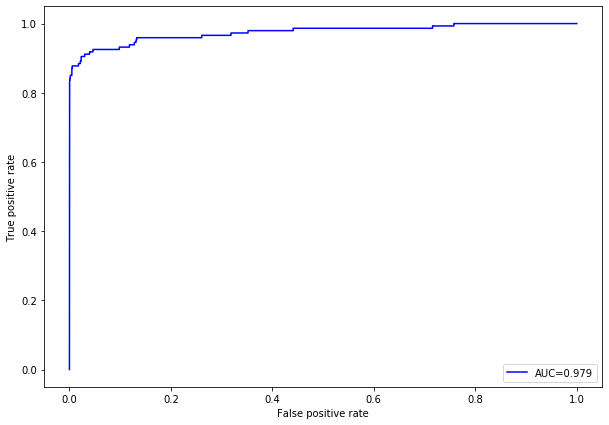

In [112]:
fpr,tpr, threshold= metrics.roc_curve(y_test,y_pred_proba[:,-1])
roc_auc2= metrics.auc(fpr,tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,'b',label="AUC=%0.3f" % roc_auc)
plt.legend(loc='lower right')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [116]:
print('Model Improvement (AUC score) of {:0.2f}%.'.format( 100 * (roc_auc2 - roc_auc1) / roc_auc1))


Model Improvement (AUC score) of 0.63%.


# Saving the model

In [118]:
from joblib import dump, load
dump(model, 'Credit_card_Fraud_detection.joblib') 

['Credit_card_Fraud_detection.joblib']